https://python-sounddevice.readthedocs.io/en/0.3.7/
http://homediyelectronics.com/projects/howtomakeafreesoundcardpcoscilloscope/?p=3

In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
import math,sys,os
import numpy as np
import numpy.random as rand
from numpy.fft import fft
import sounddevice as sd
from matplotlib import rcParams, animation, rc
from __future__ import print_function, division

fs = 96000
#fs = 48000
sd.default.samplerate = fs

sd.default.channels = 1
sd.default.dtype = 'float64'
duration = 10.5  # seconds

t = np.arange(0,duration,1/fs)
dt = 1/fs


In [72]:
import numpy as np

x = np.array([1,2,1,0,1,2,1,0])
w = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x))

for coef,freq in zip(w,freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,f=freq))

(8+0j) * exp(2 pi i t * 0.0)
   -4j * exp(2 pi i t * 0.25)
    4j * exp(2 pi i t * -0.25)


In [73]:
freqs

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

In [59]:
t.size
myrecording.T[0].size

1008000

In [40]:
myrecording = sd.rec(int(duration * fs), dtype='float64', samplerate=fs, channels=2)
sd.wait()

In [47]:
myrecording

array([[  6.04360139e-07,   2.71622547e-08],
       [ -1.06875023e-05,  -4.80337235e-07],
       [ -1.48330992e-05,  -6.66656149e-07],
       ..., 
       [ -4.27354276e-01,  -4.26632464e-01],
       [ -3.92587543e-01,  -3.92438233e-01],
       [ -3.56961668e-01,  -3.58097225e-01]])

In [61]:
sd.play(myrecording, 48000)

In [67]:
np.exp(2j * np.pi * np.arange(8) / 8)

array([  1.00000000e+00 +0.00000000e+00j,
         7.07106781e-01 +7.07106781e-01j,
         6.12323400e-17 +1.00000000e+00j,
        -7.07106781e-01 +7.07106781e-01j,
        -1.00000000e+00 +1.22464680e-16j,
        -7.07106781e-01 -7.07106781e-01j,
        -1.83697020e-16 -1.00000000e+00j,   7.07106781e-01 -7.07106781e-01j])

In [81]:
freq, w.size

(-0.125, 1008000)

504000


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


-0.125

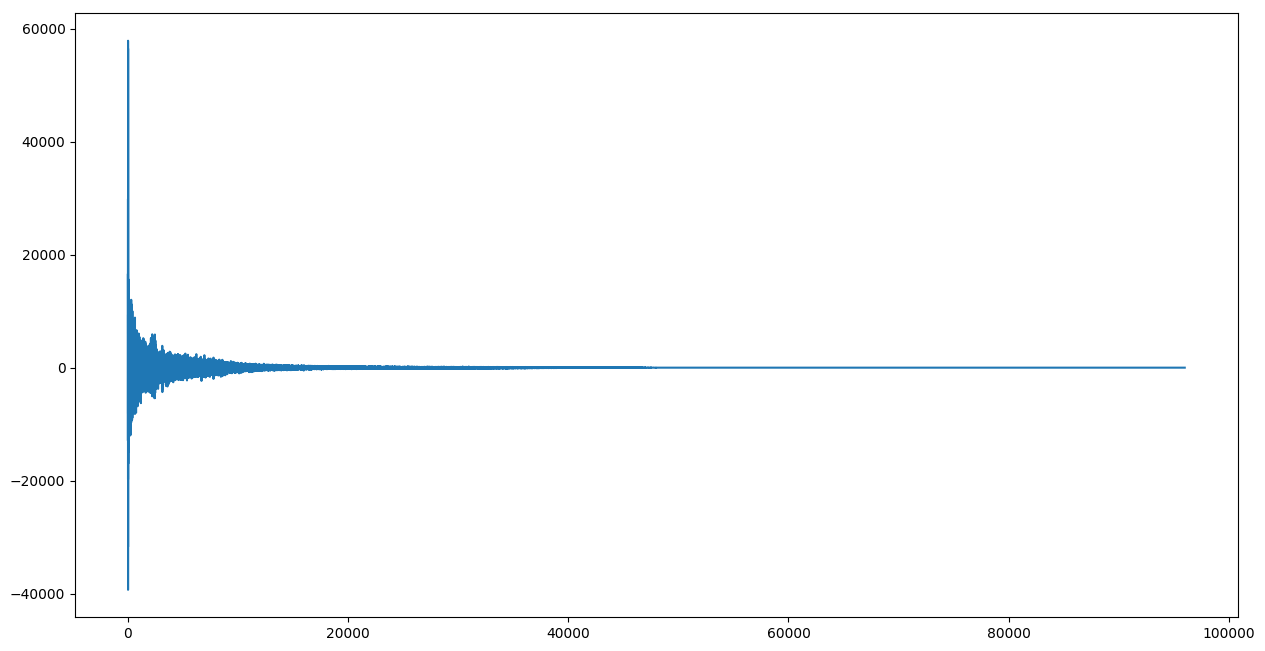

In [92]:
plt.figure(figsize=[15,8],dpi=100)
myrecording_w=fft(myrecording.T[0])
w = np.arange(0,fs,2/(duration))
print(w.size)
freqs = np.fft.fftfreq(int(duration*1000))
plt.plot(w,myrecording_w[:fs*duration/2])
#plt.semilogy(w,myrecording_w[:fs*duration/2])
#plt.loglog(w,myrecording_w[:fs*duration/2])

freq

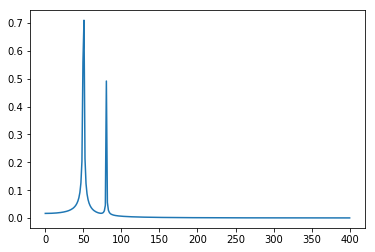

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

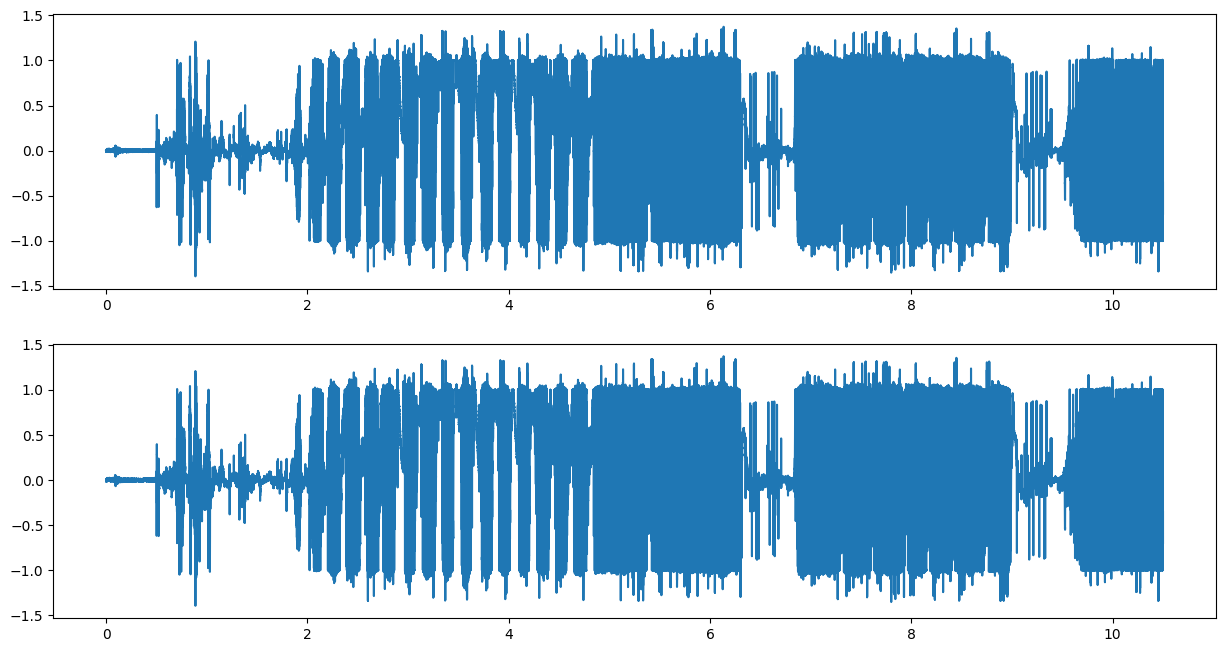

In [65]:
plt.figure(figsize=[15,8],dpi=100)
plt.subplot(211)
plt.plot(t,myrecording.T[0])
plt.subplot(212)
plt.plot(t,myrecording.T[1])
